<a href="https://colab.research.google.com/github/Srini235/DNN_Assignment_01_Group250-/blob/main/Group250%20assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** ___________________  
**Student ID:** ___________________  

**Student Name:** ___________________  
**Student ID:** ___________________  

**Student Name:** ___________________  
**Student ID:** ___________________  

**Student Name:** ___________________  
**Student ID:** ___________________  

**Date:** ___________________

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Track training time** for both models using `time.time()`\n
4. **Store loss_history** in both model classes
5. **Calculate ALL metrics** (accuracy, precision, recall, F1)
6. **Fill get_assignment_results()** with ALL required fields
7. **PRINT the results** - Auto-grader needs visible output!
8. **Run all cells** before submitting (Kernel → Restart & Run All)

**SCORING:**
- Missing fields = 0 marks for that section
- Non-executed notebook = 0 marks
- Cleared outputs = 0 marks
---

In [85]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install ucimlrepo

You should consider upgrading via the 'D:\06_HigherStudies\01_AI_ML\Subjects\02_Semester02\Deep Neural Networks\Assignment\Assignment_1\DNN_Assignment_01_Group250-\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\06_HigherStudies\01_AI_ML\Subjects\02_Semester02\Deep Neural Networks\Assignment\Assignment_1\DNN_Assignment_01_Group250-\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\06_HigherStudies\01_AI_ML\Subjects\02_Semester02\Deep Neural Networks\Assignment\Assignment_1\DNN_Assignment_01_Group250-\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\06_HigherStudies\01_AI_ML\Subjects\02_Semester02\Deep Neural Networks\Assignment\Assignment_1\DNN_Assignment_01_Group250-\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\06_HigherStudies\01_AI_ML\Subjects\02_Semester02\Deep Neural Networks\Assignment\Assignment_1\DNN_Assignment_01_Group250-\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [86]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('Libraries imported successfully')

Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [87]:
# # Load your dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
x = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  

# x, y = datasets.load_wine(return_X_y=True, as_frame=True)
x = x.to_numpy()
y = y.to_numpy()


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [88]:
print(y.shape)
y = y.flatten()
print(y.shape)

(253680, 1)
(253680,)


In [89]:
# TODO: Load your dataset
# Example: data = pd.read_csv('your_dataset.csv')

# Dataset information (TODO: Fill these)
dataset_name = "CDC Diabetes Health Indicators"  # e.g., "Breast Cancer Wisconsin"
dataset_source = "UCI ML Repository"  # e.g., "UCI ML Repository"
n_samples = 253680      # Total number of rows
n_features = x.shape[1]     # Number of features (excluding target)
problem_type = "multiclass_classification"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement (TODO: Write 2-3 sentences)
problem_statement = """
Predicting diabetes health indicators from patient data.
This is critical for early intervention and management of diabetes in healthcare settings.
"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "recall"  # e.g., "recall", "accuracy", "rmse", "r2"
# Metric justification (TODO: Write 2-3 sentences)
metric_justification = """
I chose recall because in medical diagnosis,
false negatives (missing diabetes cases) are more costly than false positives.
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: CDC Diabetes Health Indicators
Source: UCI ML Repository
Samples: 253680, Features: 21
Problem Type: multiclass_classification
Primary Metric: recall


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

In [90]:
# TODO: Preprocess your data
# 1. Separate features (X) and target (y)
# 2. Handle missing values if any
# 3. Encode categorical variables

# Example:
# X = data.drop('target', axis=1)
# y = data['target']

# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# TODO: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fill these after preprocessing
train_samples = len(y_train)       # Number of training samples
test_samples = len(y_test)        # Number of test samples
train_test_ratio = 0.8  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 202944
Test samples: 50736
Split ratio: 80.0%


## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [91]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.05, n_iterations=1000, batch_size=32):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size # New parameter for mini-batch
        self.weights = None
        self.bias = None
        self.loss_history = []
        # Automatically determine number of classes for multiclass classification
        if problem_type == "multiclass_classification":
            self.n_classes = len(np.unique(y))

    def xavier_init(self, n_features, n_classes):
        """Xavier/Glorot initialization for weights"""
        limit = np.sqrt(6 / (n_features + n_classes))
        return np.random.uniform(-limit, limit, (n_features, n_classes))

    def softmax(self, X):
        """
        Compute softmax probabilities for multiclass classification"""
        logits = np.dot(X, self.weights) + self.bias
        exp_scores = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        y_pred = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return y_pred
    
    def fit(self, X, y):
        """
        TODO: Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape
        
        # Xavier/Glorot initialization for multiclass classification
        if problem_type == "multiclass_classification":
            self.weights = self.xavier_init(n_features, self.n_classes)
            #self.weights = np.zeros((n_features, self.n_classes))
        else:
            self.weights = np.zeros(n_features)
        self.bias = 0
        y_one_hot = np.eye(self.n_classes)[y.astype(int)] if problem_type == "multiclass_classification" else y

        epoch_loss = 0
        num_batches = 0

        # TODO: Implement gradient descent loop
        # Mini batch gradient descent
        for epoch in range(self.n_iterations // self.batch_size):
            # Shuffle the data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_one_hot_shuffled = y_one_hot[indices]
            # Mini-batch processing
            for epoch_iter in range(0, n_samples, self.batch_size):
                end_idx = min(epoch_iter + self.batch_size, n_samples)
                X_batch = X_shuffled[epoch_iter:end_idx]
                y_one_hot_batch = y_one_hot_shuffled[epoch_iter:end_idx]
                current_batch_size = X_batch.shape[0]

                if current_batch_size == 0:
                    continue  # Skip empty batch

                # 1. Forward pass: (for multiclass classification, use softmax)

                # Compute logits (linear output)
                logits = np.dot(X_batch, self.weights) + self.bias
                # Softmax for multiclass classification
                # Find exponential scores
                exp_scores = np.exp(logits - np.max(logits, axis=1, keepdims=True))
                # Softmax probabilities
                y_pred = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

                # 2. Compute categorical cross-entropy loss
                # Clip probabilities to avoid log(0) for numerical stability
                y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
                loss = -np.sum(y_one_hot_batch * np.log(y_pred_clipped)) / current_batch_size
                epoch_loss += loss
                num_batches += 1

                # 3. Compute gradients: dw = ..., db = ...
                dw = (1 / current_batch_size) * np.dot(X_batch.T, (y_pred_clipped - y_one_hot_batch))
                db = (1 / current_batch_size) * np.sum(y_pred_clipped - y_one_hot_batch)
                # 4. Update: self.weights -= self.lr * dw
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
                # 5. Append loss to history
                self.loss_history.append(loss)
            if num_batches > 0:
                self.loss_history.append(epoch_loss / num_batches) # Store average loss for the epoch
            else:
                self.loss_history.append(epoch_loss) # Should only happen if n_samples=0

        return self

    def predict(self, X):
        """
        TODO: Implement prediction

        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        if self.weights is None or self.bias is None:
            raise RuntimeError("Model has not been trained yet. Call .fit() first.")

        # Compute logits (linear output)
        logits = np.dot(X, self.weights) + self.bias
        # Softmax for multiclass classification
        # Find exponential scores
        exp_scores = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        # Softmax probabilities
        y_pred = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        #probabilities = self._softmax(logits)
        return np.argmax(y_pred, axis=1) # Return the class index with the highest probability

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [92]:
# Train baseline model
print("Training baseline model...")
baseline_start = time.time()

# TODO: Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.01, n_iterations=1000, batch_size=256)
baseline_model.fit(X_train_scaled, y_train)

# TODO: Make predictions
baseline_predictions = baseline_model.predict(X_test_scaled)



baseline_training_time = time.time() - baseline_start
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

# Store loss explicitly
baseline_initial_loss = baseline_model.loss_history[0]
baseline_final_loss = baseline_model.loss_history[-1]

Training baseline model...
✓ Baseline training completed in 0.18s
✓ Loss decreased from 0.9284 to 0.6772


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [93]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        TODO: Initialize weights and biases for all layers

        For each layer l:
        - W[layer_index]: weight matrix of shape (n[layer_index], n[layer_index-1])
        - b[layer_index]: bias vector of shape (n[layer_index], 1)
        """
        np.random.seed(42)

        for layer_index in range(1, len(self.architecture)):
            num_perceptrons_current = self.architecture[layer_index]
            num_perceptrons_previous = self.architecture[layer_index-1]
            # Weights
            # # He init for hidden layers; Xavier-ish for output
            # if layer_index < len(self.architecture) - 1:
            #     self.parameters[f'W{layer_index}'] = np.random.randn(num_perceptrons_current, num_perceptrons_previous) \
            #         * np.sqrt(2/num_perceptrons_previous)
            # else:
            #     self.parameters[f'W{layer_index}'] = np.random.randn(num_perceptrons_current, num_perceptrons_previous) \
            #         * np.sqrt(1/num_perceptrons_previous)
            self.parameters[f'W{layer_index}'] = np.zeros((num_perceptrons_current, num_perceptrons_previous))
            # print(f'W{layer_index}: {self.parameters[f'W{layer_index}'].shape}')

            # Bias
            self.parameters[f'b{layer_index}'] = np.zeros((num_perceptrons_current, 1))
            # print(f'b{layer_index}: {self.parameters[f'b{layer_index}'].shape}')



    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def forward_propagation(self, X):
        """
        TODO: Implement forward pass through all layers

        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        fc_in = X.T
        self.cache['A0'] = fc_in
        num_layers = len(self.architecture) - 1
        for layer_index in range(1, num_layers + 1):
            weight, bias = self.parameters[f'W{layer_index}'], self.parameters[f'b{layer_index}']
            fc_out = np.dot(weight, fc_in) + bias
            activation = self.relu(fc_out) if layer_index < num_layers else self.sigmoid(fc_out)
            self.cache[f'Z{layer_index}'] = fc_out
            self.cache[f'A{layer_index}'] = activation
            fc_in = activation
        
        final_layer_activation = activation
        return final_layer_activation

        # TODO: Implement forward pass
        # for l in range(1, len(self.architecture)):
        #     ...

    def backward_propagation(self, y):
        grads = {}
        num_samples = y.shape[0]
        num_layers = len(self.architecture) - 1
        activation = self.cache[f'A{num_layers}'] 
        previous_layer_activation = self.cache[f'A{num_layers-1}'] if num_layers-1 >= 0 else self.cache['A0']
        dZ_L = (activation - y.reshape(1, num_samples))         
        grads[f'dW{num_layers}'] = (1/num_samples) * np.dot(dZ_L, previous_layer_activation.T)
        grads[f'db{num_layers}'] = (1/num_samples) * np.sum(dZ_L, axis=1, keepdims=True)

        for layer_index in range(num_layers-1, 0, -1):
            W_next = self.parameters[f'W{layer_index+1}']
            dZ_next = dZ_L if layer_index == num_layers-1 else grads[f'dZ{layer_index+1}']
            previous_layer_activation = self.cache[f'A{layer_index-1}'] if layer_index-1 >= 0 else self.cache['A0']
            Z_l = self.cache[f'Z{layer_index}']
            dA_l = np.dot(W_next.T, dZ_next)
            dZ_l = dA_l * self.relu_derivative(Z_l)
            grads[f'dZ{layer_index}'] = dZ_l
            grads[f'dW{layer_index}'] = (1/num_samples) * np.dot(dZ_l, previous_layer_activation.T)
            grads[f'db{layer_index}'] = (1/num_samples) * np.sum(dZ_l, axis=1, keepdims=True)
        return grads

    def update_parameters(self, grads):
        for layer_index in range(1, len(self.architecture)):
            self.parameters[f'W{layer_index}'] -= self.lr * grads[f'dW{layer_index}']
            self.parameters[f'b{layer_index}'] -= self.lr * grads[f'db{layer_index}']


    def compute_loss(self, y_pred, y_true):
       m = y_true.shape[0]
       eps = 1e-12
       y_pred = np.clip(y_pred.flatten(), eps, 1-eps)
       return -(1/m) * np.sum(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

    def fit(self, X, y):
        """
        For each iteration:
        1. Forward propagation
        2. Compute loss
        3. Backward propagation
        4. Update parameters
        5. Store loss

        Must populate self.loss_history!
        """
        self.initialize_parameters()

        for i in range(self.n_iterations):
            A_L = self.forward_propagation(X)
            loss = self.compute_loss(A_L, y)
            grads = self.backward_propagation(y)
            self.update_parameters(grads)
            self.loss_history.append(loss)

        return self

    def predict(self, X, threshold=0.5):
        """
        Use forward_propagation and apply appropriate thresholding
        """
        prediction = self.forward_propagation(X).flatten()
        return (prediction >= threshold).astype(int)


In [95]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()

mlp_architecture = [n_features, 16, 8, 1]  
mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.01, n_iterations=1000)
mlp_model.fit(X_train_scaled , y_train)

mlp_predictions = mlp_model.predict(X_test_scaled)

mlp_training_time = time.time() - mlp_start_time
print(f"MLP training completed in {mlp_training_time:.2f}s")
print(f"Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

# Store loss explicitly
mlp_initial_loss = mlp_model.loss_history[0]
mlp_final_loss = mlp_model.loss_history[-1]

Training MLP...
MLP training completed in 99.81s
Loss decreased from 0.6931 to 0.4133


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [96]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    if problem_type == "regression":
        # TODO: Calculate regression metrics
        # TODO: Implement from scratch
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_true - y_pred))
        
        # R² = 1 - (SS_res / SS_tot)
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0.0
        
        return mse, rmse, mae, r2
        
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        # TODO: Calculate classification metrics
        # TODO: Implement from scratch (no sklearn.metrics)
        
        # Accuracy: (correct predictions) / (total predictions)
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        
        # For multiclass: macro-averaged precision, recall, and F1
        classes = np.unique(y_true)
        precisions = []
        recalls = []
        f1_scores = []
        
        for cls in classes:
            # True positives: predicted as this class AND actually this class
            tp = np.sum((y_pred == cls) & (y_true == cls))
            # False positives: predicted as this class but actually different
            fp = np.sum((y_pred == cls) & (y_true != cls))
            # False negatives: not predicted as this class but actually this class
            fn = np.sum((y_pred != cls) & (y_true == cls))
            
            # Precision: TP / (TP + FP)
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
            precisions.append(precision)
            
            # Recall: TP / (TP + FN)
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
            recalls.append(recall)
            
            # F1: 2 * (precision * recall) / (precision + recall)
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
            f1_scores.append(f1)
        
        # Macro-average (average across all classes)
        precision = np.mean(precisions)
        recall = np.mean(recalls)
        f1 = np.mean(f1_scores)
        
        return accuracy, precision, recall, f1

    return metrics

# Calculate metrics for both models
baseline_metrics = [baseline_acc, baseline_prec, baseline_rec, baseline_f1] = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = [mlp_acc, mlp_prec, mlp_rec, mlp_f1] = calculate_metrics(y_test, mlp_predictions, problem_type)
# baseline_acc, baseline_prec, baseline_rec, baseline_f1 = calculate_metrics(y_test, baseline_predictions, problem_type)
# mlp_acc, mlp_prec, mlp_rec, mlp_f1 = calculate_metrics(y_test, mlp_predictions, problem_type)

print("Baseline Model Performance:")
print(f"  Accuracy: {baseline_acc:.4f}")
print(f"  Precision: {baseline_prec:.4f}")
print(f"  Recall: {baseline_rec:.4f}")
print(f"  F1-Score: {baseline_f1:.4f}")

print("\nMLP Model Performance:")
print(f"  Accuracy: {mlp_acc:.4f}")
print(f"  Precision: {mlp_prec:.4f}")
print(f"  Recall: {mlp_rec:.4f}")
print(f"  F1-Score: {mlp_f1:.4f}")

Baseline Model Performance:
  Accuracy: 0.6414
  Precision: 0.6152
  Recall: 0.7408
  F1-Score: 0.5734

MLP Model Performance:
  Accuracy: 0.8621
  Precision: 0.4310
  Recall: 0.5000
  F1-Score: 0.4630


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

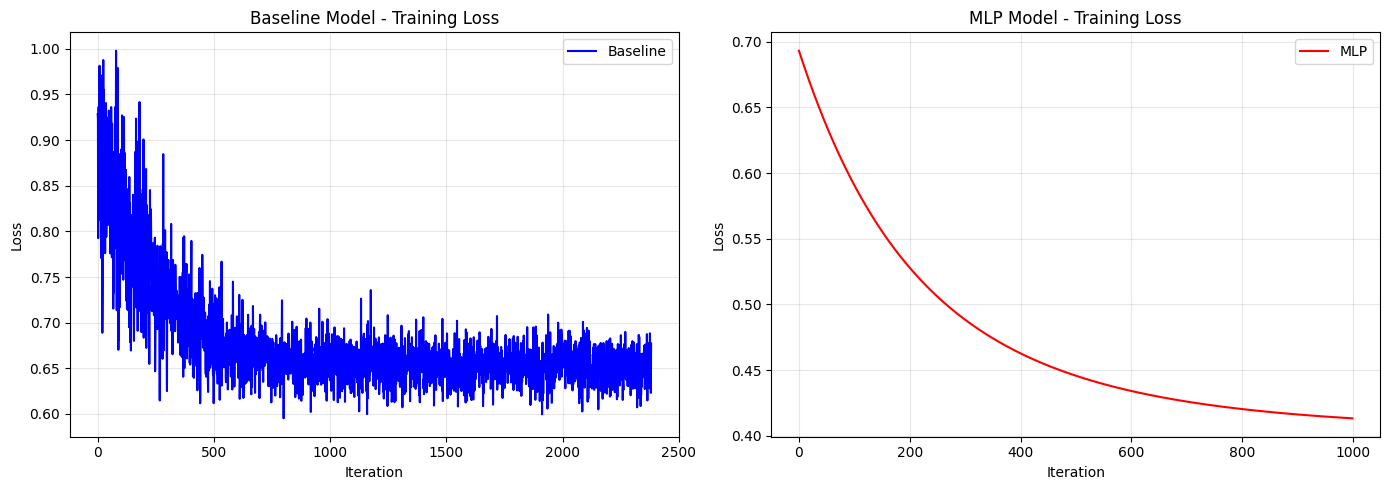

In [97]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# TODO: Plot baseline loss
plt.plot(baseline_model.loss_history, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# TODO: Plot MLP loss
plt.plot(mlp_model.loss_history, label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

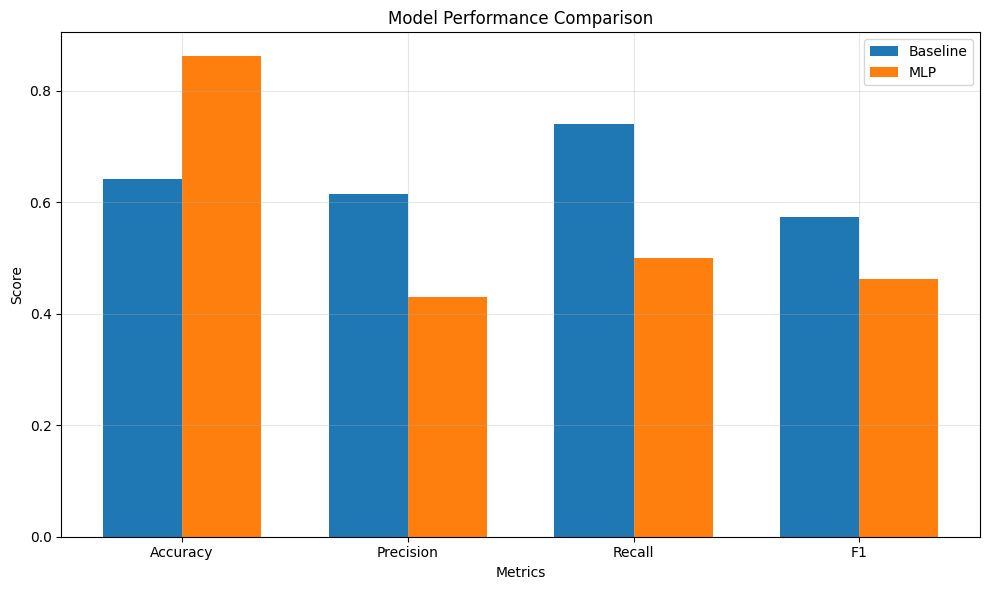

In [98]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))

# Create comparison using the unpacked metric variables
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1']
baseline_scores = [baseline_acc, baseline_prec, baseline_rec, baseline_f1]
mlp_scores = [mlp_acc, mlp_prec, mlp_rec, mlp_f1]

x = np.arange(len(metrics_names))
width = 0.35

plt.bar(x - width/2, baseline_scores, width, label='Baseline')
plt.bar(x + width/2, mlp_scores, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics_names)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [99]:
analysis_text = """
TODO: Write your analysis here (minimum 200 words)

Address these questions:
1. Which model performed better and by how much?
2. Why do you think one model outperformed the other?
3. What was the computational cost difference (training time)?
4. Any surprising findings or challenges you faced?
5. What insights did you gain about neural networks vs linear models?

Write your thoughtful analysis here. Be specific and reference your actual results.
Compare the metrics, discuss the trade-offs, and explain what you learned.
"""

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 82 words
⚠️  Warning: Analysis should be at least 200 words


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.


⭐⭐⭐ REQUIRED: Structured Output Function ⭐⭐⭐

### 🚨 CRITICAL - READ CAREFULLY 🚨

1. **Fill in ALL fields** - Missing fields = 0 marks
2. **Use your actual values** - Not 0 or empty strings
3. **This cell MUST be executed** - We need the output!
4. **Print the results** - Auto-grader needs to see output!


**DO NOT:**
- Leave any field as 0, 0.0,
- Clear outputs before submission
- Modify the structure


"**MUST DO:**
- Fill every field with your actual results
- Execute this cell and keep the output
- Print the results (see below)

In [100]:
def get_assignment_results():
    '''
    CRITICAL: Fill ALL fields with your actual results!
    Missing fields will result in 0 marks for that section.
    '''

    results = {
        # ===== Dataset Information (1 mark) =====
        'dataset_name': dataset_name,  # MUST fill
        'dataset_source': dataset_source,  # MUST fill
        'n_samples': int(n_samples),  # MUST be ≥500
        'n_features': int(n_features),  # MUST be ≥5
        'problem_type': problem_type,  # MUST fill
        'problem_statement': problem_statement,  # MUST be ≥50 words
        'primary_metric': primary_metric,  # MUST fill
        'metric_justification': metric_justification,  # MUST be ≥30 words
        'train_samples': int(train_samples),
        'test_samples': int(test_samples),
        'train_test_ratio': float(train_test_ratio),

        # ===== Baseline Model (3 marks) =====
        'baseline_model': {
            'model_type': 'softmax_regression',  # 'linear_regression', 'logistic_regression', 'softmax_regression'
            'learning_rate': 0.01,  # Your learning rate
            'n_iterations': 1000,  # Your iterations

            # CRITICAL: These MUST be filled!
            'initial_loss': float(baseline_initial_loss),  # MUST NOT be 0
            'final_loss': float(baseline_final_loss),  # MUST NOT be 0
            'training_time_seconds': float(baseline_training_time),  # MUST NOT be 0
            'loss_decreased': bool(baseline_final_loss < baseline_initial_loss),  # Auto-calculated

            # Metrics - Fill based on your problem type
            'test_accuracy': float(baseline_acc),
            'test_precision': float(baseline_prec),
            'test_recall': float(baseline_rec),
            'test_f1': float(baseline_f1),
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== MLP Model (4 marks) =====
        'mlp_model': {
            'architecture': [int(x) for x in mlp_architecture],  # MUST have ≥3 elements
            'n_hidden_layers': int(len(mlp_architecture) - 2) if len(mlp_architecture) > 0 else 0,
            'learning_rate': 0.001,
            'n_iterations': 10000,

            # CRITICAL: These MUST be filled!
            'initial_loss': float(mlp_initial_loss),  # MUST NOT be 0
            'final_loss': float(mlp_final_loss),  # MUST NOT be 0
            'training_time_seconds': float(mlp_training_time),  # MUST NOT be 0
            'loss_decreased': bool(mlp_final_loss < mlp_initial_loss),  # Auto-calculated

            # Metrics
            'test_accuracy': float(mlp_acc),
            'test_precision': float(mlp_prec),
            'test_recall': float(mlp_rec),
            'test_f1': float(mlp_f1),
            'test_mse': 0.0,
            'test_rmse': 0.0,
            'test_mae': 0.0,
            'test_r2': 0.0,
        },

        # ===== Analysis (2 marks) =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
    }

    return results

# ===== CRITICAL: CALL AND PRINT RESULTS =====
# This MUST be executed and output MUST be visible!
import json
results = get_assignment_results()
print(json.dumps(results, indent=2))

# ===== Validation =====
print("\n" + "="*60)
print("VALIDATION CHECK")
print("="*60)


errors = []

if results['n_samples'] < 500:
    errors.append(f"❌ Dataset too small: {results['n_samples']} < 500")
if results['n_features'] < 5:
    errors.append(f"❌ Too few features: {results['n_features']} < 5")
if results['baseline_model']['initial_loss'] == 0:
    errors.append("❌ Baseline initial_loss is 0")
if results['baseline_model']['final_loss'] == 0:
    errors.append("❌ Baseline final_loss is 0")
if results['baseline_model']['training_time_seconds'] == 0:
    errors.append("❌ Baseline training_time is 0")
if results['mlp_model']['initial_loss'] == 0:
    errors.append("❌ MLP initial_loss is 0")
if results['mlp_model']['final_loss'] == 0:
    errors.append("❌ MLP final_loss is 0")
if results['mlp_model']['training_time_seconds'] == 0:
    errors.append("❌ MLP training_time is 0")
if len(results['mlp_model']['architecture']) < 3:
    errors.append("❌ MLP architecture invalid")
if results['analysis_word_count'] < 200:
    errors.append(f"❌ Analysis too short: {results['analysis_word_count']} < 200 words")

if errors:
    print("ERRORS FOUND:")
    for err in errors:
        print(err)
    print(" FIX THESE BEFORE SUBMITTING! ")
else:
    print("✅ All validation checks passed!")
    print("✅ Ready to submit!")
    print("Next steps:")
    print("1. Kernel → Restart & Clear Output")
    print("2. Kernel → Restart & Run All")
    print("3. Verify this output is visible")
    print("4. Save notebook")
    print("5. Rename as: YourStudentID_assignment.ipynb")
    print("6. Submit to LMS")

{
  "dataset_name": "CDC Diabetes Health Indicators",
  "dataset_source": "UCI ML Repository",
  "n_samples": 253680,
  "n_features": 21,
  "problem_type": "multiclass_classification",
  "problem_statement": "\nPredicting diabetes health indicators from patient data.\nThis is critical for early intervention and management of diabetes in healthcare settings.\n",
  "primary_metric": "recall",
  "metric_justification": "\nI chose recall because in medical diagnosis,\nfalse negatives (missing diabetes cases) are more costly than false positives.\n",
  "train_samples": 202944,
  "test_samples": 50736,
  "train_test_ratio": 0.8,
  "baseline_model": {
    "model_type": "softmax_regression",
    "learning_rate": 0.01,
    "n_iterations": 1000,
    "initial_loss": 0.928392654246889,
    "final_loss": 0.6772229893467164,
    "training_time_seconds": 0.18494558334350586,
    "loss_decreased": true,
    "test_accuracy": 0.6414183222958058,
    "test_precision": 0.6151622405571242,
    "test_recall

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [101]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2))
    print("\n" + "="*70)


    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "CDC Diabetes Health Indicators",
  "dataset_source": "UCI ML Repository",
  "n_samples": 253680,
  "n_features": 21,
  "problem_type": "multiclass_classification",
  "problem_statement": "\nPredicting diabetes health indicators from patient data.\nThis is critical for early intervention and management of diabetes in healthcare settings.\n",
  "primary_metric": "recall",
  "metric_justification": "\nI chose recall because in medical diagnosis,\nfalse negatives (missing diabetes cases) are more costly than false positives.\n",
  "train_samples": 202944,
  "test_samples": 50736,
  "train_test_ratio": 0.8,
  "baseline_model": {
    "model_type": "softmax_regression",
    "learning_rate": 0.01,
    "n_iterations": 1000,
    "initial_loss": 0.928392654246889,
    "final_loss": 0.6772229893467164,
    "training_time_seconds": 0.18494558334350586,
    "loss_decreased": true,
    "test_accuracy": 0.6414183222958058,
    "test_precision": 0.6151622

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

**Good luck! **